In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
final_df = pd.read_csv("results_asg4.csv")
final_df.head()

,Unnamed: 0,text,labels,CNN_olid_small,CNN_hasoc,BiLSTM_olid_small,BiLSTM_hasoc,roberta_olid_small,hateBERT_olid_small,roberta_hasoc,...,NB_olid_small,SVM_olid_small,NB_hasoc,SVM_hasoc,Hard Majority (OLID),Hard Majority (HASOC),Soft Majority (OLID),Soft Majority (HASOC),Meta Model (OLID),Meta Model (HASOC)
0,15923,# WhoIsQ # WheresTheServer #...,1,1,1,0,0,1,0,1,...,1,1,0,1,1,1,1,1,1,1
1,27014,# ConstitutionDay is revered by Conserv...,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30530,# FOXNews # NRA # MAGA ...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13876,# Watching # Boomer getting the ...,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,60133,# NoPasaran : Unity demo to oppo...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.metrics import f1_score

f1_macro_olid_small_HM = np.round(f1_score(final_df.labels, final_df["Hard Majority (OLID)"], average='macro'),2)
f1_macro_hasoc_HM = np.round(f1_score(final_df.labels,  final_df["Hard Majority (HASOC)"], average='macro'),2)

f1_macro_olid_small_SM = np.round(f1_score(final_df.labels, final_df["Soft Majority (OLID)"], average='macro'),2)
f1_macro_hasoc_SM = np.round(f1_score(final_df.labels,  final_df["Soft Majority (HASOC)"], average='macro'),2)

f1_macro_olid_small_M = np.round(f1_score(final_df.labels, final_df["Meta Model (OLID)"], average='macro'),2)
f1_macro_hasoc_M = np.round(f1_score(final_df.labels,  final_df["Meta Model (HASOC)"], average='macro'),2)

#BASELINE
f1_olid_small_roberta = np.round(f1_score(final_df.labels, final_df.roberta_olid_small, average='macro'), 2)
f1_hasoc_roberta = np.round(f1_score(final_df.labels, final_df.roberta_hasoc, average='macro'), 2)



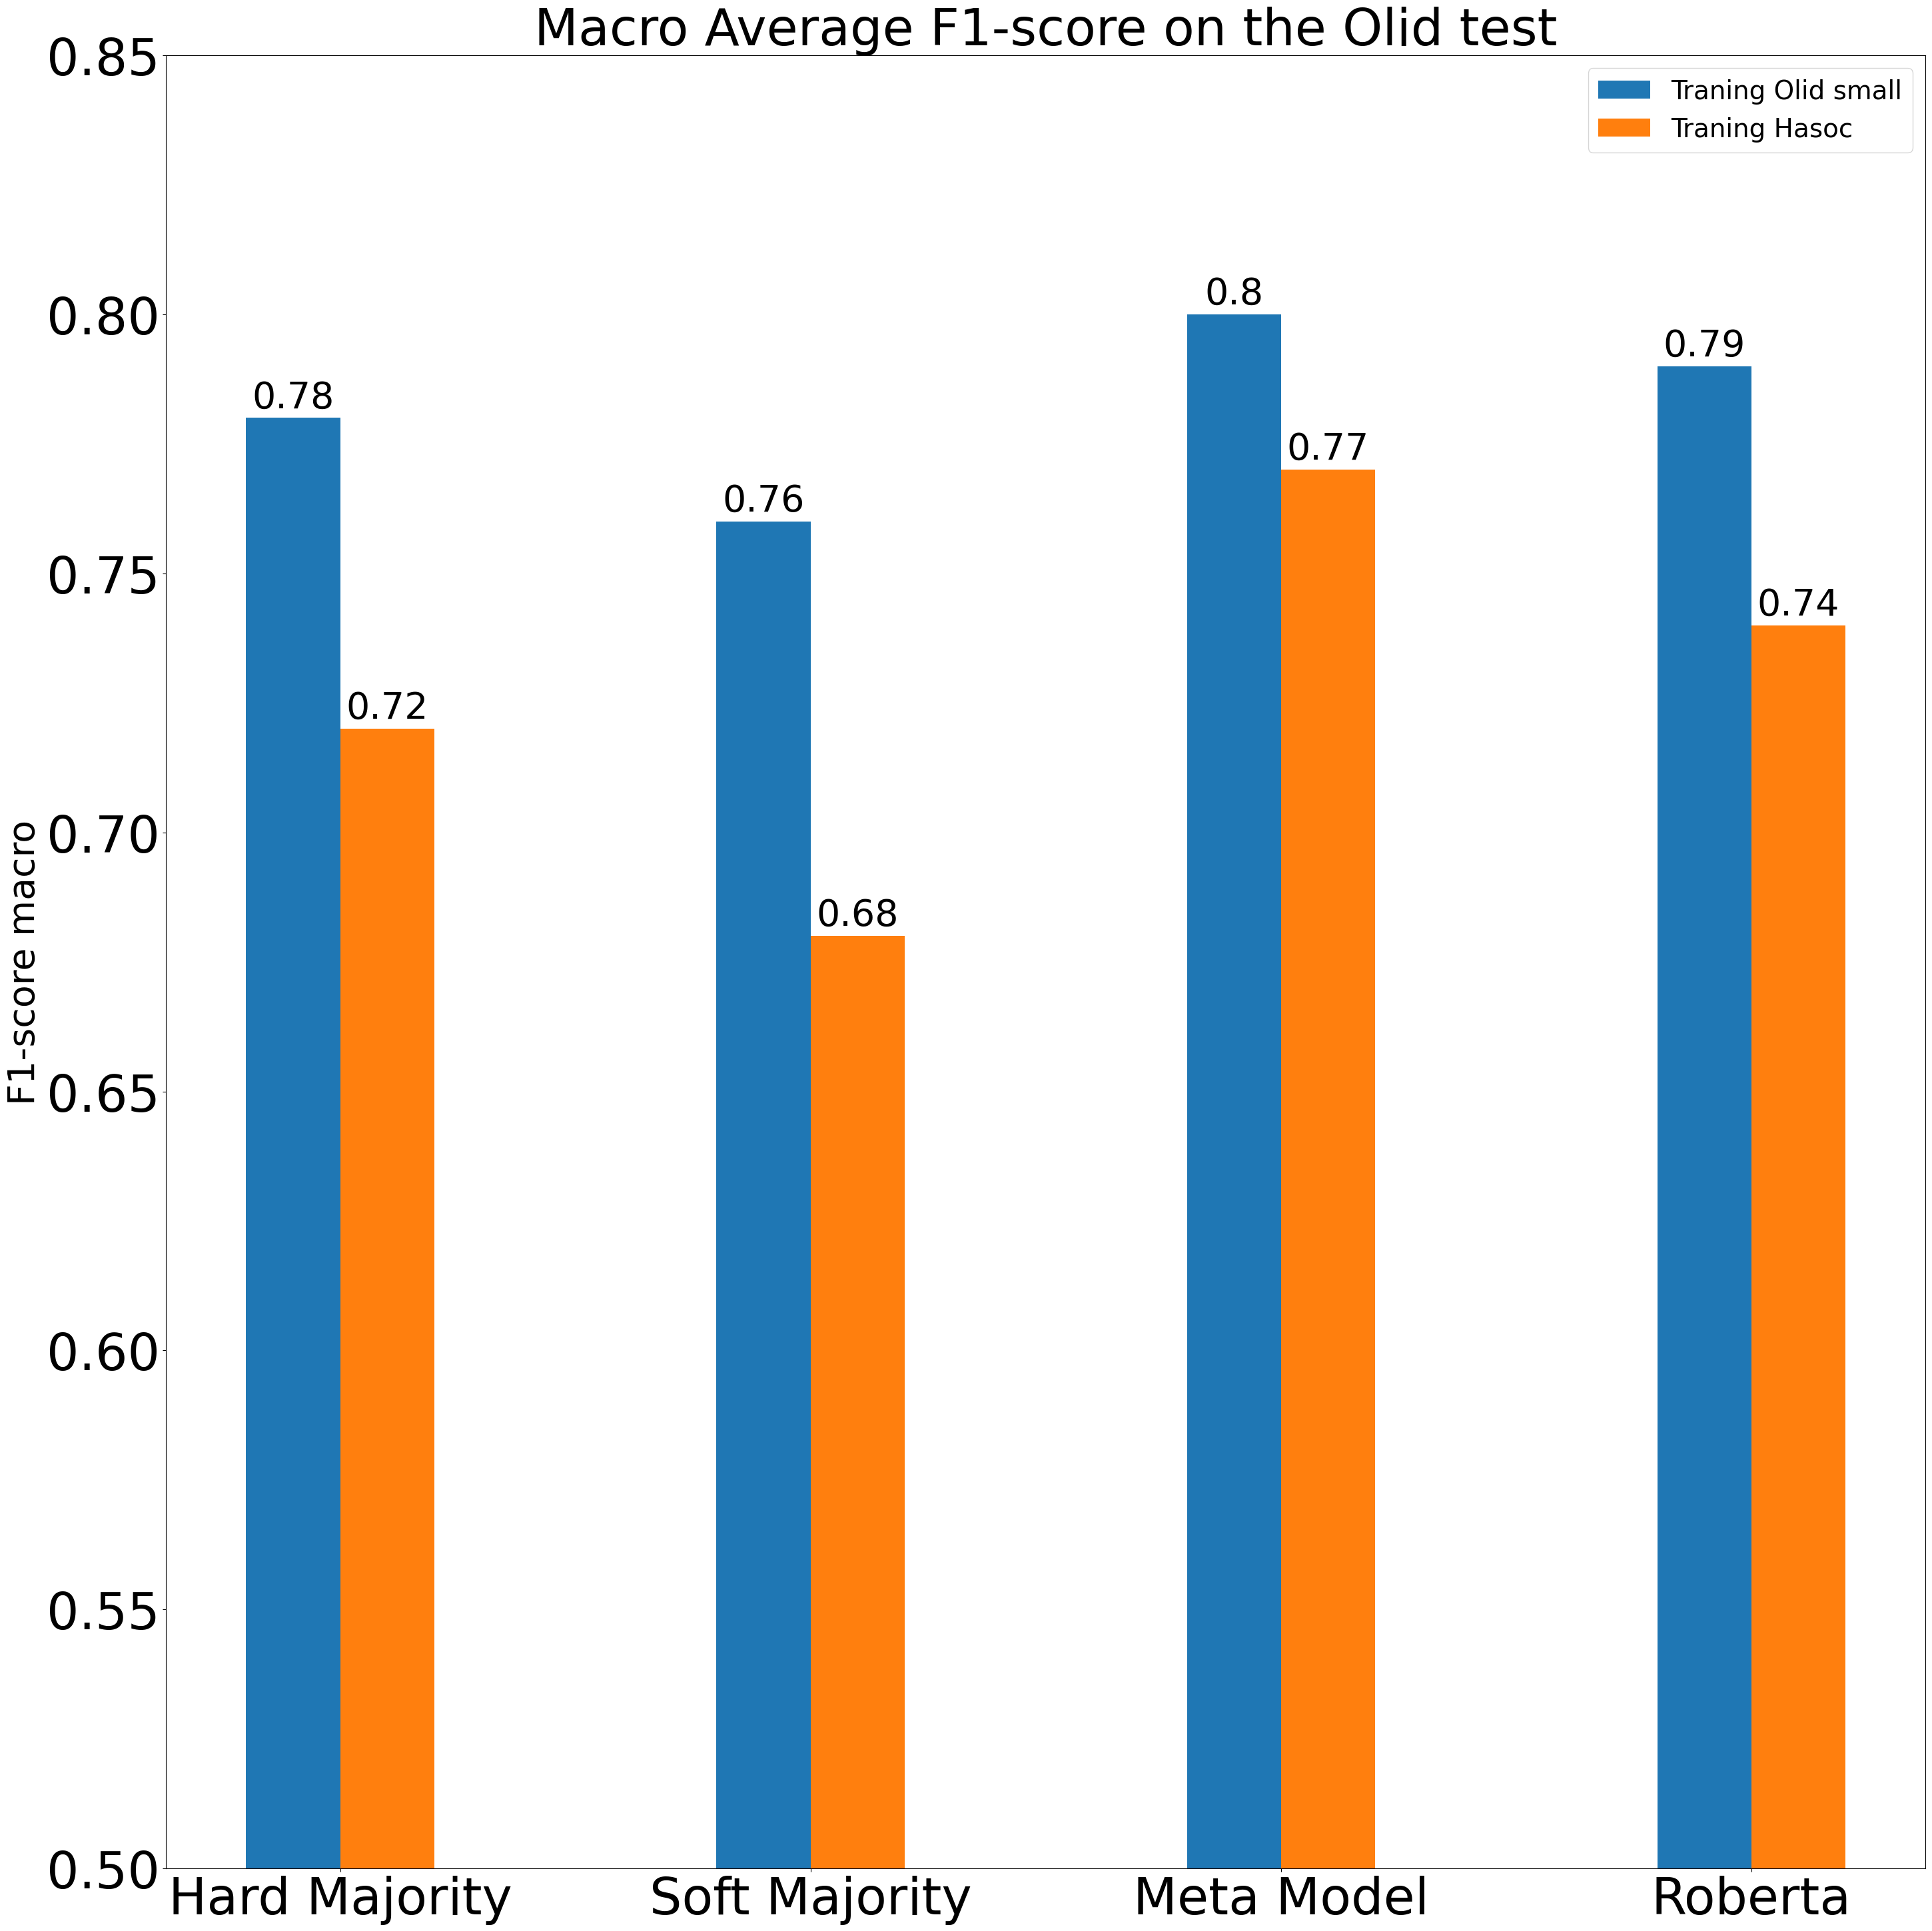

In [59]:
from numpy import size

SMALL_SIZE = 18
MEDIUM_SIZE = 28
BIGGER_SIZE = 40
EXTRA_BIG = 55

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=EXTRA_BIG)    # fontsize of the tick labels
plt.rc('ytick', labelsize=EXTRA_BIG)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=EXTRA_BIG)  # fontsize of the figure title

labels = ["Hard Majority", "Soft Majority", "Meta Model", "Roberta"] 
x = np.arange(len(labels))  # the label locations
width =  0.20  # the width of the bars

olid_small = [f1_macro_olid_small_HM, f1_macro_olid_small_SM, f1_macro_olid_small_M, f1_olid_small_roberta]
hasoc = [f1_macro_hasoc_HM, f1_macro_hasoc_SM, f1_macro_hasoc_M, f1_hasoc_roberta]

fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)

x_offset = (0 - 2 / 2) * width + width / 2
rects1 = ax.bar(x + x_offset, olid_small, width, label='Traning Olid small')
x_offset = (1 - 2 / 2) * width + width / 2
rects2 = ax.bar(x + x_offset, hasoc, width, label='Traning Hasoc')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-score macro')
ax.set_title('Macro Average F1-score on the Olid test', fontsize = EXTRA_BIG)
ax.set_xticks(x, labels)
ax.legend(loc="best")
plt.ylim(0.5, 0.85)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

### Soft Majority ###
#Soft Majority Olid Small
precision_olid_small_SM_1 = precision_score(final_df.labels,   final_df["Soft Majority (OLID)"], pos_label=1, average='binary')
recall_olid_small_SM_1 = recall_score(final_df.labels,  final_df["Soft Majority (OLID)"], pos_label=1, average='binary')
f1_macro_olid_small_SM_1 = f1_score(final_df.labels,   final_df["Soft Majority (OLID)"], pos_label=1, average='binary')
precision_olid_small_SM_0 = precision_score(final_df.labels,   final_df["Soft Majority (OLID)"], pos_label=0, average='binary')
recall_olid_small_SM_0 = recall_score(final_df.labels,   final_df["Soft Majority (OLID)"],pos_label=0, average='binary')
f1_macro_olid_small_SM_0 = f1_score(final_df.labels,   final_df["Soft Majority (OLID)"], pos_label=0, average='binary')

#Soft Majority Hasoc
precision_hasoc_SM_1 = precision_score(final_df.labels, final_df["Soft Majority (HASOC)"], pos_label=1, average='binary')
recall_hasoc_SM_1 = recall_score(final_df.labels, final_df["Soft Majority (HASOC)"], pos_label=1, average='binary')
f1_macro_hasoc_SM_1 = f1_score(final_df.labels,  final_df["Soft Majority (HASOC)"], pos_label=1, average='binary')
precision_hasoc_SM_0 = precision_score(final_df.labels,  final_df["Soft Majority (HASOC)"], pos_label=0, average='binary')
recall_hasoc_SM_0 = recall_score(final_df.labels, final_df["Soft Majority (HASOC)"],pos_label=0, average='binary')
f1_macro_hasoc_SM_0 = f1_score(final_df.labels,  final_df["Soft Majority (HASOC)"], pos_label=0, average='binary')

accuracy_olid_small_SM = accuracy_score(final_df.labels, final_df["Soft Majority (OLID)"], normalize=True)
accuracy_hasoc_SM = accuracy_score(final_df.labels, final_df["Soft Majority (HASOC)"], normalize=True)

### Hard Majority ###
#Hard Majority Olid Small
precision_olid_small_HM_1 = precision_score(final_df.labels,   final_df["Hard Majority (OLID)"], pos_label=1, average='binary')
recall_olid_small_HM_1 = recall_score(final_df.labels,  final_df["Hard Majority (OLID)"], pos_label=1, average='binary')
f1_macro_olid_small_HM_1 = f1_score(final_df.labels,   final_df["Hard Majority (OLID)"], pos_label=1, average='binary')
precision_olid_small_HM_0 = precision_score(final_df.labels,   final_df["Hard Majority (OLID)"], pos_label=0, average='binary')
recall_olid_small_HM_0 = recall_score(final_df.labels,   final_df["Hard Majority (OLID)"],pos_label=0, average='binary')
f1_macro_olid_small_HM_0 = f1_score(final_df.labels,   final_df["Hard Majority (OLID)"], pos_label=0, average='binary')

#Hard majority Hasoc
precision_hasoc_HM_1 = precision_score(final_df.labels, final_df["Hard Majority (HASOC)"], pos_label=1, average='binary')
recall_hasoc_HM_1 = recall_score(final_df.labels, final_df["Hard Majority (HASOC)"], pos_label=1, average='binary')
f1_macro_hasoc_HM_1 = f1_score(final_df.labels,  final_df["Hard Majority (HASOC)"], pos_label=1, average='binary')
precision_hasoc_HM_0 = precision_score(final_df.labels,  final_df["Hard Majority (HASOC)"], pos_label=0, average='binary')
recall_hasoc_HM_0 = recall_score(final_df.labels, final_df["Hard Majority (HASOC)"],pos_label=0, average='binary')
f1_macro_hasoc_HM_0 = f1_score(final_df.labels,  final_df["Hard Majority (HASOC)"], pos_label=0, average='binary')

accuracy_olid_small_HM = accuracy_score(final_df.labels, final_df["Hard Majority (OLID)"], normalize=True)
accuracy_hasoc_HM = accuracy_score(final_df.labels, final_df["Hard Majority (HASOC)"], normalize=True)

### Meta Model ###
#Meta Model Olid Small
precision_olid_small_M_1 = precision_score(final_df.labels,   final_df["Meta Model (OLID)"], pos_label=1, average='binary')
recall_olid_small_M_1 = recall_score(final_df.labels,  final_df["Meta Model (OLID)"], pos_label=1, average='binary')
f1_macro_olid_small_M_1 = f1_score(final_df.labels,   final_df["Meta Model (OLID)"], pos_label=1, average='binary')
precision_olid_small_M_0 = precision_score(final_df.labels,   final_df["Meta Model (OLID)"], pos_label=0, average='binary')
recall_olid_small_M_0 = recall_score(final_df.labels,   final_df["Meta Model (OLID)"],pos_label=0, average='binary')
f1_macro_olid_small_M_0 = f1_score(final_df.labels,   final_df["Meta Model (OLID)"], pos_label=0, average='binary')

#Meta Model Hasoc
precision_hasoc_M_1 = precision_score(final_df.labels, final_df["Meta Model (HASOC)"], pos_label=1, average='binary')
recall_hasoc_M_1 = recall_score(final_df.labels, final_df["Meta Model (HASOC)"], pos_label=1, average='binary')
f1_macro_hasoc_M_1 = f1_score(final_df.labels,  final_df["Meta Model (HASOC)"], pos_label=1, average='binary')
precision_hasoc_M_0 = precision_score(final_df.labels,  final_df["Meta Model (HASOC)"], pos_label=0, average='binary')
recall_hasoc_M_0 = recall_score(final_df.labels, final_df["Meta Model (HASOC)"],pos_label=0, average='binary')
f1_macro_hasoc_M_0 = f1_score(final_df.labels,  final_df["Meta Model (HASOC)"], pos_label=0, average='binary')

accuracy_olid_small_M = accuracy_score(final_df.labels, final_df["Meta Model (OLID)"], normalize=True)
accuracy_hasoc_M = accuracy_score(final_df.labels, final_df["Meta Model (HASOC)"], normalize=True)

In [9]:
print("META MODEL OLID")
print(np.round(precision_olid_small_M_1,2))
print(np.round(recall_olid_small_M_1,2))
print(np.round(f1_macro_olid_small_M_1,2))
print(np.round(precision_olid_small_M_0,2))
print(np.round(recall_olid_small_M_0,2))
print(np.round(f1_macro_olid_small_M_0,2))
print(np.round(accuracy_olid_small_M,2))
print(np.round(f1_macro_olid_small_M,2))

print("META MODEL HASOC")
print(np.round(precision_hasoc_M_1,2))
print(np.round(recall_hasoc_M_1,2))
print(np.round(f1_macro_hasoc_M_1,2))
print(np.round(precision_hasoc_M_0,2))
print(np.round(recall_hasoc_M_0,2))
print(np.round(f1_macro_hasoc_M_0,2))
print(np.round(accuracy_hasoc_M,2))
print(np.round(f1_macro_hasoc_M,2))

META MODEL OLID
0.78
0.62
0.69
0.87
0.93
0.9
0.85
0.8
META MODEL HASOC
0.78
0.55
0.64
0.84
0.94
0.89
0.83
0.77


In [13]:
print("HARD MAJORITY OLID")
print(np.round(precision_olid_small_HM_1,2))
print(np.round(recall_olid_small_HM_1,2))
print(np.round(f1_macro_olid_small_HM_1,2))
print(np.round(precision_olid_small_HM_0,2))
print(np.round(recall_olid_small_HM_0,2))
print(np.round(f1_macro_olid_small_HM_0,2))
print(np.round(accuracy_olid_small_HM,2))
print(np.round(f1_macro_olid_small_HM,2))

print("HARD MAJORITY OLID")
print(np.round(precision_hasoc_HM_1,2))
print(np.round(recall_hasoc_HM_1,2))
print(np.round(f1_macro_hasoc_HM_1,2))
print(np.round(precision_hasoc_HM_0,2))
print(np.round(recall_hasoc_HM_0,2))
print(np.round(f1_macro_hasoc_HM_0,2))
print(np.round(accuracy_hasoc_HM,2))
print(np.round(f1_macro_hasoc_HM,2))

HARD MAJORITY OLID
0.82
0.57
0.67
0.85
0.95
0.9
0.84
0.78
HARD MAJORITY OLID
0.67
0.51
0.58
0.83
0.9
0.86
0.79
0.72


In [14]:
print("SOFT MAJORITY OLID")
print(np.round(precision_olid_small_SM_1,2))
print(np.round(recall_olid_small_SM_1,2))
print(np.round(f1_macro_olid_small_SM_1,2))
print(np.round(precision_olid_small_SM_0,2))
print(np.round(recall_olid_small_SM_0,2))
print(np.round(f1_macro_olid_small_SM_0,2))
print(np.round(accuracy_olid_small_SM,2))
print(np.round(f1_macro_olid_small_SM,2))

print("SOFT MAJORITY OLID")
print(np.round(precision_hasoc_SM_1,2))
print(np.round(recall_hasoc_SM_1,2))
print(np.round(f1_macro_hasoc_SM_1,2))
print(np.round(precision_hasoc_SM_0,2))
print(np.round(recall_hasoc_SM_0,2))
print(np.round(f1_macro_hasoc_SM_0,2))
print(np.round(accuracy_hasoc_SM,2))
print(np.round(f1_macro_hasoc_SM,2))

SOFT MAJORITY OLID
0.77
0.55
0.64
0.84
0.94
0.89
0.83
0.76
SOFT MAJORITY OLID
0.56
0.5
0.53
0.81
0.85
0.83
0.75
0.68


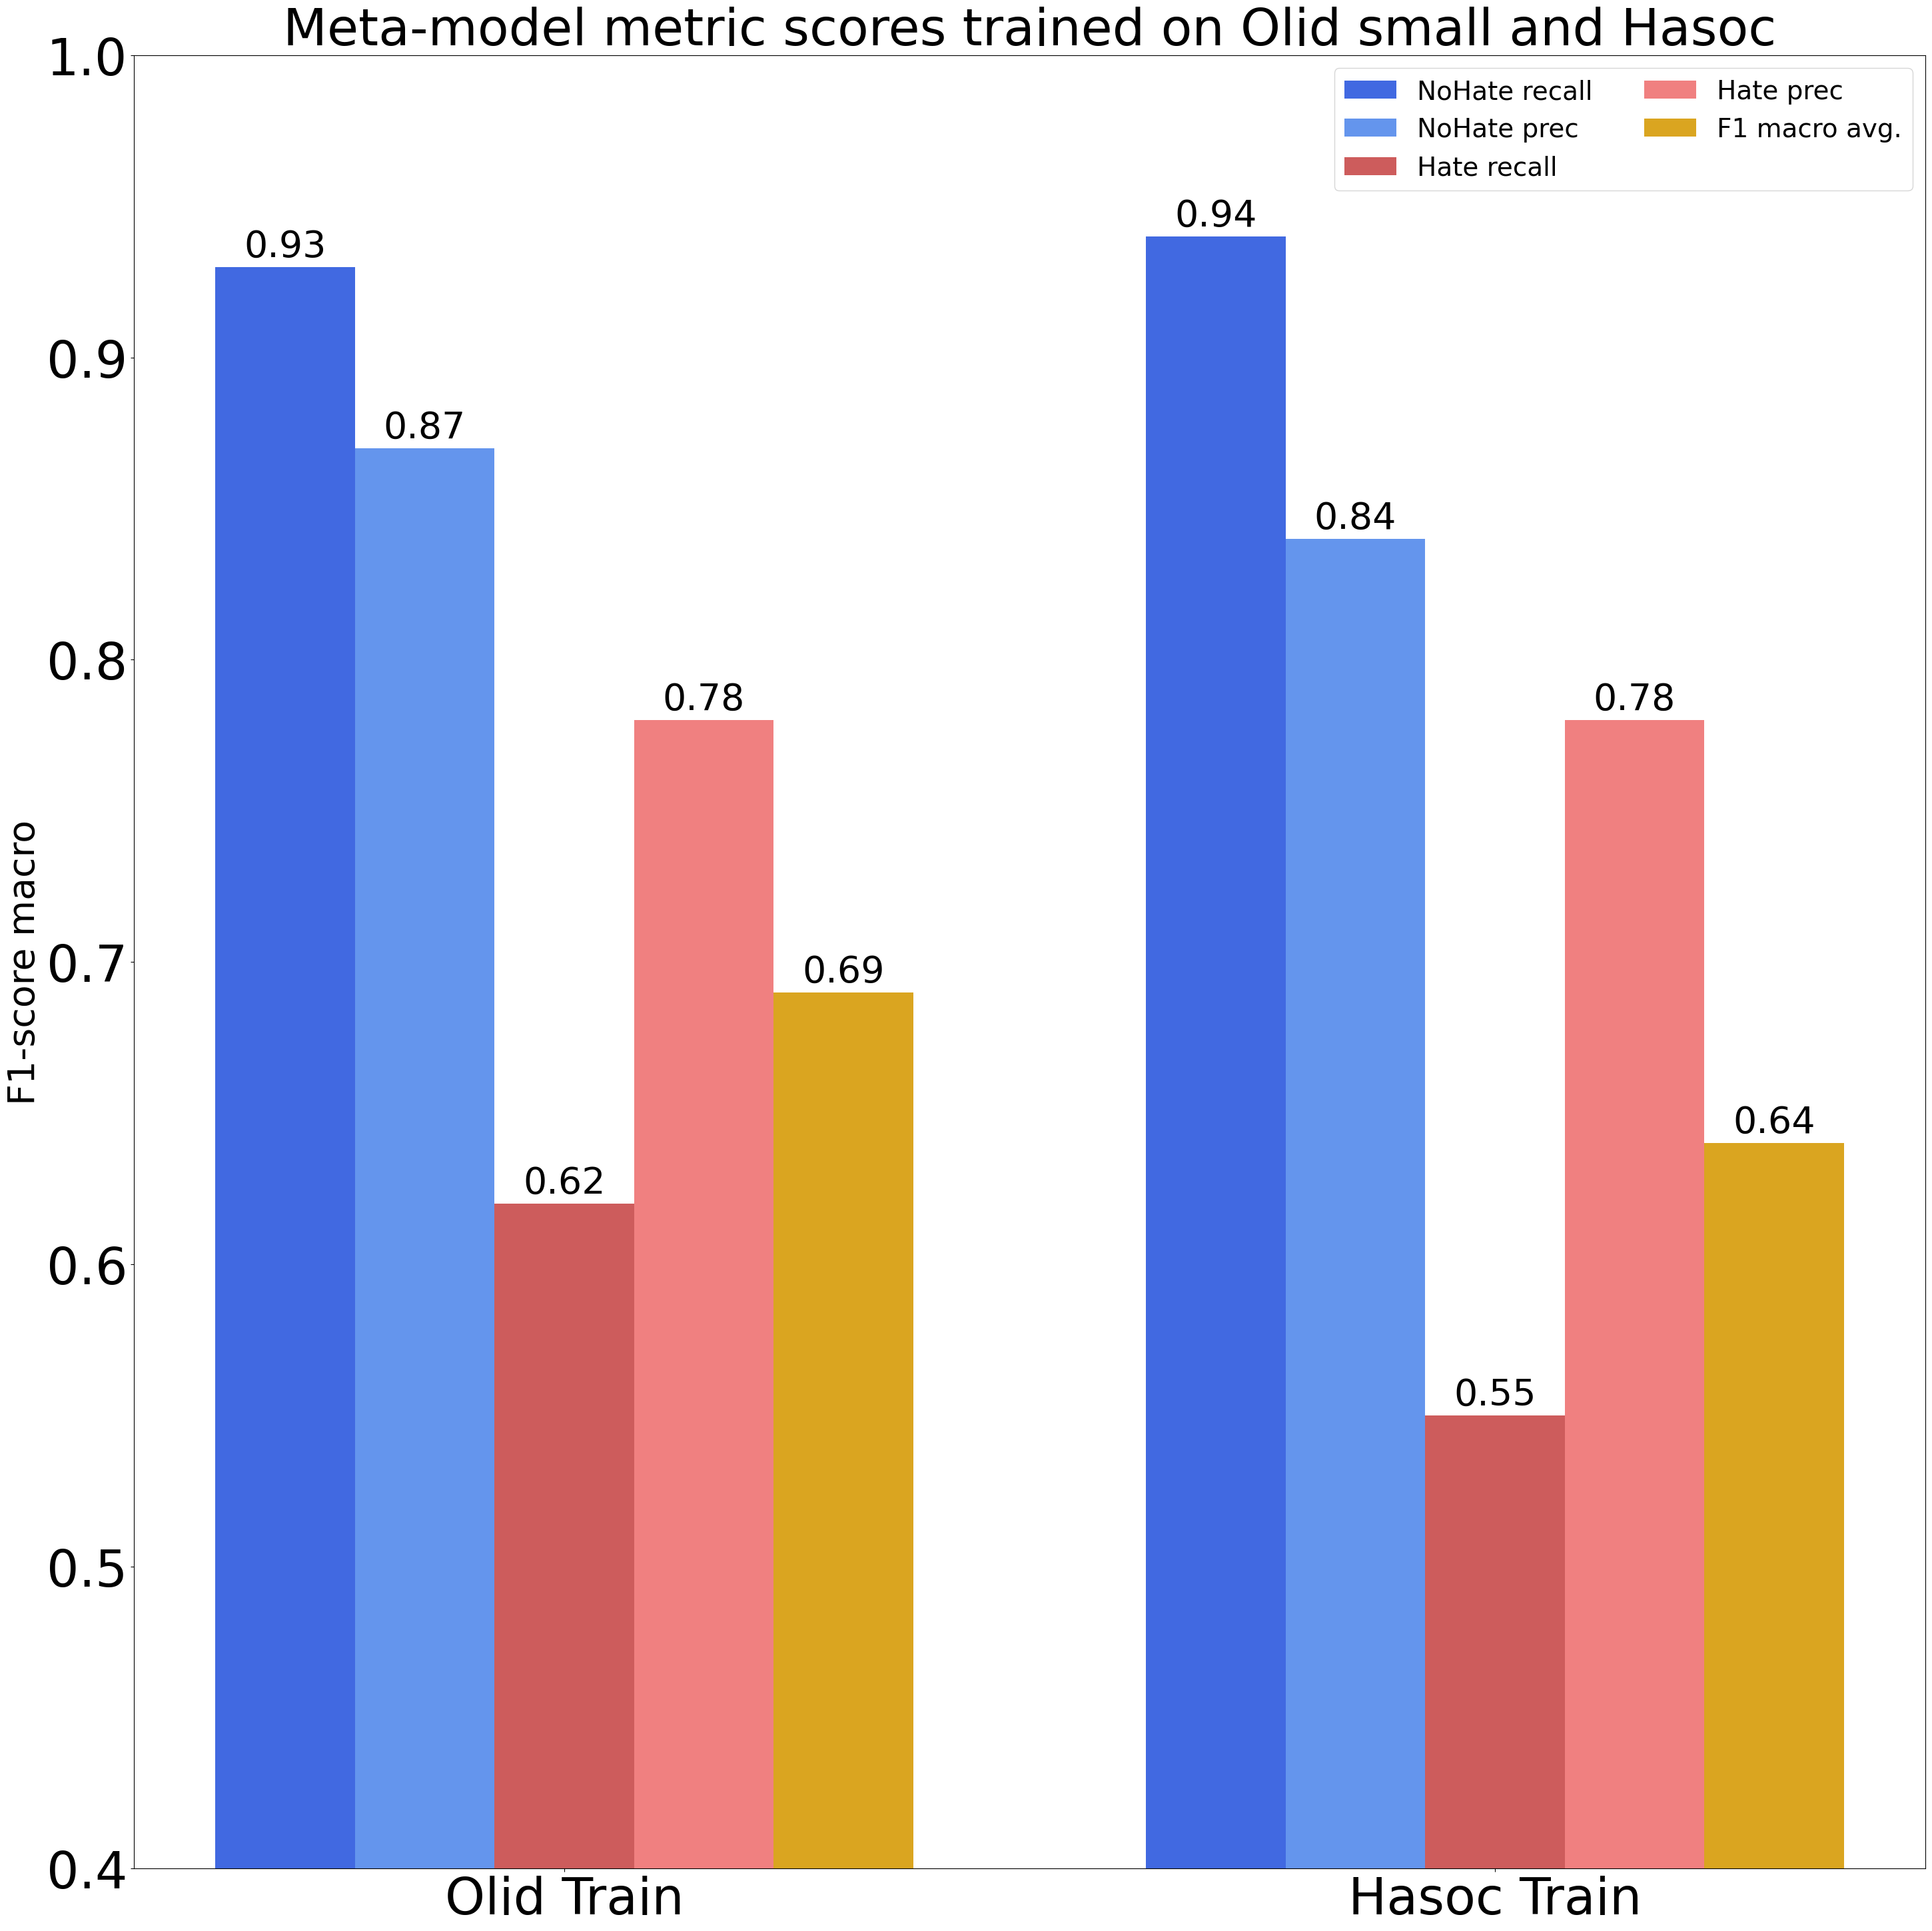

In [39]:
from numpy import size

SMALL_SIZE = 18
MEDIUM_SIZE = 28
BIGGER_SIZE = 40
EXTRA_BIG = 55

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=EXTRA_BIG)    # fontsize of the tick labels
plt.rc('ytick', labelsize=EXTRA_BIG)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=EXTRA_BIG)  # fontsize of the figure title

labels = ["Olid Train", "Hasoc Train"] 
x = np.arange(len(labels))  # the label locations
width =  0.15 # the width of the bars


recall_0  = [np.round(recall_olid_small_M_0,2), np.round(recall_hasoc_M_0,2)]
recall_1  = [np.round(recall_olid_small_M_1,2), np.round(recall_hasoc_M_1,2)] 
prec_0  = [np.round(precision_olid_small_M_0,2), np.round(precision_hasoc_M_0,2)] 
prec_1  = [np.round(precision_olid_small_M_1,2),  np.round(precision_hasoc_M_1,2)]
f1_score = [np.round(f1_macro_olid_small_M_1,2), np.round(f1_macro_hasoc_M_1,2)]


fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)

x_offset = (0 - 5 / 2) * width + width / 2
rects1 = ax.bar(x + x_offset, recall_0, width, label='NoHate recall', color = 'royalblue')
x_offset = (1 - 5 / 2) * width + width / 2
rects2 = ax.bar(x + x_offset, prec_0, width, label='NoHate prec', color = 'cornflowerblue')


x_offset = (2 - 5 / 2) * width + width / 2
rects3 = ax.bar(x + x_offset, recall_1, width, label='Hate recall',  color = 'indianred')
x_offset = (3 - 5 / 2) * width + width / 2
rects4 = ax.bar(x + x_offset, prec_1, width, label='Hate prec', color = 'lightcoral')
x_offset = (4 - 5 / 2) * width + width / 2

rects5 = ax.bar(x + x_offset, f1_score, width, label='F1 macro avg.',  color = 'goldenrod')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-score macro')
ax.set_title('Meta-model metric scores trained on Olid small and Hasoc', fontsize = EXTRA_BIG)
ax.set_xticks(x, labels)
ax.legend(loc="best", ncol = 2)
plt.ylim(0.4, 1)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)


fig.tight_layout()
plt.show()

In [46]:
y = final_df[['Hard Majority (OLID)', 'Soft Majority (OLID)', 'Meta Model (OLID)']].copy()
y.to_csv('final_df_olid.csv',  header = False, index = False)

In [47]:
y_1 = final_df[['Hard Majority (HASOC)', 'Soft Majority (HASOC)', 'Meta Model (HASOC)']].copy()
y_1.to_csv('final_df_hasoc.csv',  header = False, index = False)

In [90]:
results_annotated = pd.read_csv("results_annotated.csv")
df_to_merge = final_df[['Unnamed: 0','Hard Majority (OLID)', 'Soft Majority (OLID)', 'Meta Model (OLID)', 'Hard Majority (HASOC)', 'Soft Majority (HASOC)', 'Meta Model (HASOC)']].copy()

In [91]:
results = pd.merge(results_annotated, df_to_merge)
results

,Unnamed: 0,text,labels,CNN_olid_small,CNN_hasoc,BiLSTM_olid_small,BiLSTM_hasoc,roberta_olid_small,hateBERT_olid_small,roberta_hasoc,...,SVM_olid_small,NB_hasoc,SVM_hasoc,category,Hard Majority (OLID),Soft Majority (OLID),Meta Model (OLID),Hard Majority (HASOC),Soft Majority (HASOC),Meta Model (HASOC)
0,15923,# WhoIsQ # WheresTheServer #...,1,1,1,0,0,1,0,1,...,1,0,1.0,lack of context,1,1,1,1,1,1
1,13876,# Watching # Boomer getting the ...,0,0,0,0,0,0,0,0,...,0,1,1.0,possible interpretations,0,0,0,0,0,0
2,60133,# NoPasaran : Unity demo to oppo...,1,0,0,0,0,0,0,0,...,0,0,0.0,lack of context,0,0,0,0,0,0
3,83681,. . . What the fuck di...,1,1,1,1,1,1,1,1,...,1,1,1.0,grey area,1,1,1,1,1,1
4,96874,# RAP is a form of ART ! Used to...,0,0,1,1,1,0,0,0,...,0,1,1.0,lack of context,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,51762,# auspol I don ' t know why he i...,1,0,0,0,0,0,0,0,...,0,0,1.0,clearly O,0,0,0,0,0,0
57,41821,@ USER oh fuck off 😂😂,1,1,1,1,1,1,1,1,...,1,1,1.0,clearly O,1,1,1,1,1,1
58,34030,$ 1500 for a phone . You all are...,1,1,1,1,1,1,1,1,...,1,1,1.0,clearly O,1,1,1,1,1,1
59,41590,@ USER # Rosie makes me nauseous...,1,0,0,0,0,0,1,0,...,0,0,0.0,clearly O,0,0,0,0,0,0


In [92]:
results = results[[c for c in results if c not in [' category']] 
       + [' category']]
results.rename(columns = {' category' : 'category'}, inplace=True)
results.dropna(inplace=True)
results

,Unnamed: 0,text,labels,CNN_olid_small,CNN_hasoc,BiLSTM_olid_small,BiLSTM_hasoc,roberta_olid_small,hateBERT_olid_small,roberta_hasoc,...,SVM_olid_small,NB_hasoc,SVM_hasoc,Hard Majority (OLID),Soft Majority (OLID),Meta Model (OLID),Hard Majority (HASOC),Soft Majority (HASOC),Meta Model (HASOC),category
0,15923,# WhoIsQ # WheresTheServer #...,1,1,1,0,0,1,0,1,...,1,0,1.0,1,1,1,1,1,1,lack of context
1,13876,# Watching # Boomer getting the ...,0,0,0,0,0,0,0,0,...,0,1,1.0,0,0,0,0,0,0,possible interpretations
2,60133,# NoPasaran : Unity demo to oppo...,1,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,lack of context
3,83681,. . . What the fuck di...,1,1,1,1,1,1,1,1,...,1,1,1.0,1,1,1,1,1,1,grey area
4,96874,# RAP is a form of ART ! Used to...,0,0,1,1,1,0,0,0,...,0,1,1.0,0,0,0,1,1,0,lack of context
5,65507,@ USER Do you get the feeling he is kis...,1,0,0,0,1,1,0,1,...,0,0,1.0,0,0,0,1,0,0,possible interpretations
6,12588,@ USER Nigga ware da hits at,1,1,0,1,0,1,1,0,...,1,0,0.0,1,1,1,0,0,0,grey area
7,65773,# Dayspromo week of September 17th ...,0,0,1,0,1,1,0,0,...,0,1,1.0,0,0,0,1,1,0,possible interpretations
8,70840,# Kavanaugh so a wild claim from 36 yea...,0,0,0,1,1,0,0,1,...,0,1,1.0,0,0,1,1,1,1,possible interpretations
9,53563,# kznlt Enjouji really is the prototype...,0,0,1,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,sarcasm


In [93]:
results = results.replace(' lack of context', 'lack of context')

results = results.replace(' sarcasm', 'sarcasm')

results = results.replace(' possible interpretations ', 'multiple meanings')
results = results.replace(' possible interpretations', 'multiple meanings')
results = results.replace('possible interpretations', 'multiple meanings')

results = results.replace(' grey area', 'grey area')

results = results.replace(' clearly NO', 'clearly NonOff')
results = results.replace('  clearly NO', 'clearly NonOff')
results = results.replace('clearly NO', 'clearly NonOff')

results = results.replace(' clearly O', 'clearly Off')
results = results.replace('clearly O', 'clearly Off')

In [94]:
print(results.columns)

Index(['Unnamed: 0', 'text', 'labels', 'CNN_olid_small', 'CNN_hasoc',
       'BiLSTM_olid_small', 'BiLSTM_hasoc', 'roberta_olid_small',
       'hateBERT_olid_small', 'roberta_hasoc', 'hateBERT_hasoc',
       'NB_olid_small', 'SVM_olid_small', 'NB_hasoc', 'SVM_hasoc',
       'Hard Majority (OLID)', 'Soft Majority (OLID)', 'Meta Model (OLID)',
       'Hard Majority (HASOC)', 'Soft Majority (HASOC)', 'Meta Model (HASOC)',
       'category'],
      dtype='object')


In [95]:
results['category'].unique()
results.drop(columns = ['CNN_olid_small', 'CNN_hasoc',
       'BiLSTM_olid_small', 'BiLSTM_hasoc', 
       'hateBERT_olid_small', 'hateBERT_hasoc',
       'NB_olid_small', 'SVM_olid_small', 'NB_hasoc', 'SVM_hasoc', 'Unnamed: 0'], inplace = True)
results.columns

Index(['text', 'labels', 'roberta_olid_small', 'roberta_hasoc',
       'Hard Majority (OLID)', 'Soft Majority (OLID)', 'Meta Model (OLID)',
       'Hard Majority (HASOC)', 'Soft Majority (HASOC)', 'Meta Model (HASOC)',
       'category'],
      dtype='object')

In [85]:
temp = results[results['category'] == 'sarcasm'] 
temp

,text,labels,roberta_olid_small,roberta_hasoc,Hard Majority (OLID),Soft Majority (OLID),Meta Model (OLID),Hard Majority (HASOC),Soft Majority (HASOC),Meta Model (HASOC),category
9,# kznlt Enjouji really is the prototype...,0,0,0,0,0,0,0,0,0,sarcasm
16,@ USER @ USER @ USER ...,1,1,0,1,0,0,0,0,0,sarcasm
21,@ USER @ USER @ USER I go...,0,1,1,1,1,1,1,1,1,sarcasm
23,# Conservatism101 It ' s not ab...,1,1,0,0,0,1,0,0,1,sarcasm
34,# Liberals # Left # Democ...,0,0,0,0,0,0,0,0,0,sarcasm
35,. JEFF SESSIONS : ‘ LIST...,1,0,0,0,0,0,0,0,0,sarcasm
36,Amazon will ship live Christmas trees to your ...,1,0,0,1,0,0,0,0,0,sarcasm
37,@ USER I BET she is a lot safer when sh...,1,1,1,0,0,0,1,1,0,sarcasm
39,# SerenaWilliams Serena was caught chea...,0,1,0,1,1,0,0,0,0,sarcasm
40,# MAGA # Qanon # GreatAwa...,1,0,0,0,0,0,0,0,0,sarcasm


In [96]:
import sklearn.metrics
res = {}
models = list(results.columns)[2:-1]



proper_colnames = ['RoBERTa (OLID)', 'RoBERTa (HASOC)', 'Hard Majority (OLID)', 'Soft Majority (OLID)', 'Meta Model (OLID)',
       'Hard Majority (HASOC)', 'Soft Majority (HASOC)', 'Meta Model (HASOC)',
                  ]

for cat in results['category'].unique():
    
    temp = results[results['category'] == cat] 

    acc = []
    rec = []
    prec = []
    for col in models:
        acc.append(sklearn.metrics.accuracy_score(temp['labels'], temp[col]).round(2))
        rec.append(sklearn.metrics.recall_score(temp['labels'], temp[col]).round(2))
        prec.append(sklearn.metrics.precision_score(temp['labels'], temp[col]).round(2))

    res[cat] = pd.DataFrame([acc, prec, rec], columns = proper_colnames, index=['Accuracy', 'Precision', 'Recall']).T
    res[cat].columns = [[cat] * 3,['Acc.', 'Prec.', 'Rec.']]
    



/home/simone/.conda/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/simone/.conda/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/simone/.conda/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/simone/.conda/envs/py10/lib/python3.10/site-packages/sklearn/metrics/_classifica

In [97]:
temp = res[list(res.keys())[0]]
for key in list(res.keys())[1:]:
    temp = pd.concat([temp, res[key]], axis=1)

temp 

lack of context             multiple meanings        \
                                 Acc. Prec.  Rec.              Acc. Prec.   
RoBERTa (OLID)                    0.5  0.67  0.57              0.67  0.67   
RoBERTa (HASOC)                   0.5  0.67  0.57              0.67  0.67   
Hard Majority (OLID)              0.6  0.80  0.57              0.78  1.00   
Soft Majority (OLID)              0.6  0.80  0.57              0.78  1.00   
Meta Model (OLID)                 0.5  0.67  0.57              0.56  0.50   
Hard Majority (HASOC)             0.2  0.40  0.29              0.44  0.40   
Soft Majority (HASOC)             0.2  0.40  0.29              0.33  0.25   
Meta Model (HASOC)                0.6  0.80  0.57              0.44  0.00   

                            grey area             sarcasm              \
                       Rec.      Acc. Prec.  Rec.    Acc. Prec.  Rec.   
RoBERTa (OLID)         0.50       0.5  0.57  0.67     0.5   0.6  0.50   
RoBERTa (HASOC)        0.50       0.5  0.60  0.50     0.4   0.5  0.17   
Hard Majority (OLID)   0.50       0.5  0.60  0.50     0.4   0.5  0.33   
Soft Majority (OLID)   0.50       0.4  0.50  0.50     0.2   0.0  0.00   
Meta Model (OLID)      0.25       0.6  0.67  0.67     0.4   0.5  0.17   
Hard Majority (HASOC)  0.50       0.4  0.50  0.17     0.4   0.5  0.17   
Soft Majority (HASOC)  0.25       0.3  0.33  0.17     0.4   0.5  0.17   
Meta Model (HASOC)     0.00       0.5  0.67  0.33     0.4   0.5  0.17   

                      clearly NonOff            clearly Off              
                                Acc. Prec. Rec.        Acc. Prec.  Rec.  
RoBERTa (OLID)                  1.00   0.0  0.0        0.56  0.83  0.62  
RoBERTa (HASOC)                 0.82   0.0  0.0        0.56  0.83  0.62  
Hard Majority (OLID)            1.00   0.0  0.0        0.44  0.80  0.50  
Soft Majority (OLID)            1.00   0.0  0.0        0.67  1.00  0.62  
Meta Model (OLID)               1.00   0.0  0.0        0.44  0.80  0.50  
Hard Majority (HASOC)           0.91   0.0  0.0        0.44  0.80  0.50  
Soft Majority (HASOC)           0.82   0.0  0.0        0.44  1.00  0.38  
Meta Model (HASOC)              1.00   0.0  0.0        0.56  1.00  0.50

In [98]:
selected_cols = []
for cols in temp.columns:
    if cols[1] == 'Acc.':
        selected_cols.append(cols)
selected_cols

[('lack of context', 'Acc.'),
 ('multiple meanings', 'Acc.'),
 ('grey area', 'Acc.'),
 ('sarcasm', 'Acc.'),
 ('clearly NonOff', 'Acc.'),
 ('clearly Off', 'Acc.')]

In [99]:
tmp2 = temp[selected_cols]
tmp2.columns = [cols[0] for cols in selected_cols]
# tmp2.columns = [['Accuracy'] * len(selected_cols),[cols[0] for cols in selected_cols]]
print(tmp2.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  lack of context &  multiple meanings &  grey area &  sarcasm &  clearly NonOff &  clearly Off \\
\midrule
RoBERTa (OLID)        &              0.5 &               0.67 &        0.5 &      0.5 &            1.00 &         0.56 \\
RoBERTa (HASOC)       &              0.5 &               0.67 &        0.5 &      0.4 &            0.82 &         0.56 \\
Hard Majority (OLID)  &              0.6 &               0.78 &        0.5 &      0.4 &            1.00 &         0.44 \\
Soft Majority (OLID)  &              0.6 &               0.78 &        0.4 &      0.2 &            1.00 &         0.67 \\
Meta Model (OLID)     &              0.5 &               0.56 &        0.6 &      0.4 &            1.00 &         0.44 \\
Hard Majority (HASOC) &              0.2 &               0.44 &        0.4 &      0.4 &            0.91 &         0.44 \\
Soft Majority (HASOC) &              0.2 &               0.33 &        0.3 &      0.4 &            0.82 &         0.44 \\


/tmp/ipykernel_47313/2997920985.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tmp2.to_latex())
